### Algerian Forest Fire Prediction

### Section A

#### Life Cycle of a Machine Learning Project

1. Understanding the problem statement.<br>
2. Data Collection<br>
3. EDA(Exploratory Data Analysis)<br>
4. Data Cleaning<br>
5. Data Pre-Processing<br>
6. Model Traning<br>
7. Choose Best Model<br>

### Problem Statement

1. Dataset consists of data for Algerian forests for 2 regions:- Bejaia and Sidi-Bel Abbes<br>
2. Aim to predict if there will be fire using various features like Temprature, wind etc.        

### Data Collection

1. The datset is taken from UCI Machine Learning Repository<br>
2. Link for the dataset:- https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++


### Data Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012) Weather data observations <br>
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42<br>
3. RH : Relative Humidity in %: 21 to 90<br>
4. Ws :Wind speed in km/h: 6 to 29<br>
5. Rain: total day in mm: 0 to 16.8 FWI Components<br>
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5<br>
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9<br>
8. Drought Code (DC) index from the FWI system: 7 to 220.4<br>
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5<br>
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68<br>
11. Fire Weather Index (FWI) Index: 0 to 31.1<br>
12. Classes: two classes, namely not fire and fire

### Section B

#### Importing data and required packages

In [13]:
##importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplot inline

import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplot` not found.


In [14]:
## read_csv
df = pd.read_csv('Algerian_forest_fires_dataset.csv')
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


In [15]:
##### Re reading csv but with header=1
df = pd.read_csv('Algerian_forest_fires_dataset.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [16]:
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [17]:
### We need to delete rows 122 and 123 
df.drop(labels=[122,123],axis=0,inplace=True)
df.iloc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire


##### Show Top 5 Rows

In [18]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


##### Show Bottom 5 Rows

In [19]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


##### Shape of the Dataset

In [20]:
df.shape

(244, 14)

The dataset has 255 rows and 14 columns

##### Show Features/Columns of the Dataset

In [21]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

**Here Classes column have spaces in it so rename the Classes column**

In [33]:
df.rename(columns={'Classes  ': 'Classes'}, inplace=True)

In [34]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

##### Summary of the Data

In [22]:
### Display statistics of the Dataframe
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


##### Check Null Values and DataTypes of the features

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
dtypes: object(14)
memory usage: 28.6+ KB


Classes column have 1 null value

In [38]:
### check null value in Classes column
df[df['Classes'] == np.nan]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes


##### Check Duplicate Values

In [40]:
df.duplicated().sum()

0

Dataset have no duplicate values

##### Check Number of Unique values for each column

In [41]:
df.nunique()

day             31
month            4
year             1
Temperature     19
 RH             62
 Ws             18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            127
Classes          8
dtype: int64

In [42]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

**Classes column have different labels for same information. Cleaning the Classes column**

In [45]:
df['Classes'].loc[(df['Classes'] == 'not fire   ') | (df['Classes'] == 'not fire ') | (df['Classes'] == 'not fire     ') | (df['Classes'] == 'not fire    ')] = 'not fire'


In [46]:
df['Classes'].unique()

array(['not fire', 'fire   ', 'fire', 'fire ', nan], dtype=object)

In [47]:
df['Classes'].loc[(df['Classes'] == 'fire   ') | (df['Classes'] == 'fire ') ] = 'fire'
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [49]:
df[df['Classes'].isnull().values]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [50]:
### As there is only 1 Nan value so replcaing it with mode
import statistics
df['Classes'].mode()

0    fire
Name: Classes, dtype: object

In [51]:
df['Classes'].mode()[0]

'fire'

In [52]:
### replacing Nan with mode
df['Classes'].fillna(df['Classes'].mode()[0],inplace=True)

In [53]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

#### Section B Report

1. Dataset is for 2 regions.<br>
2. All the columns are object type, so we need to change some columns to numeric.<br>
3. There are 255 rows and 14 columns in the dataset.<br>
4. Classes had 1 null value which is replaced by the mode of the same column.<br>
5. There are no duplicate values in the dataset.<br>

### Section C: Cleaning the Data

We already cleaned few columns like Classes, in this section I will try to change the datatypes of the columns

##### Check datatypes of the columns

In [55]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [56]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [60]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

RH, Ws and Rain columns have spaces in them so renaming the columns.

In [61]:
df.rename(columns={' RH':'RH', ' Ws':'WS', 'Rain ':'Rain'}, inplace=True)

In [62]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'WS', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

##### Changing the Datatypes

In [65]:
for feature in ['day', 'month', 'year', 'Temperature', 'RH', 'WS']:
    df[feature] = df[feature].astype(str).astype(int)

In [66]:
df.dtypes

day             int32
month           int32
year            int32
Temperature     int32
RH              int32
WS              int32
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

In [73]:
df[df['DC'] == '14.6 9']

,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
167,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,fire


In [86]:
df.iloc[165]['DC']

'14.6 9'

In [92]:
df['DC'].replace('14.6 9','14.69',inplace=True)

In [93]:
df.iloc[165]['DC']

'14.69'

In [95]:
df.iloc[165]['FWI']

'fire   '

In [96]:
df['FWI'].replace('fire   ',df['FWI'].mode()[0],inplace=True)

In [97]:
df.iloc[165]['FWI']

'0.4'

In [98]:
for feature in ['Rain', 'FFMC','DMC', 'DC', 'ISI', 'BUI', 'FWI']:
    df[feature] = df[feature].astype(str).astype(float)

In [99]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
WS               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes         object
dtype: object

### Section D: Exploring the Data

##### Description of the dataset

In [100]:
df.describe()

,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.008197
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.437383
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


##### Show Categories in the columns

In [102]:
print("Categories in 'month' column: ",end=" ")
print(df['month'].unique())
print("\n")

print("Categories in 'Classes' column: ",end=" ")
print(df['Classes'].unique())

Categories in 'month' column:  [6 7 8 9]


Categories in 'Classes' column:  ['not fire' 'fire']


##### Encoding

In [107]:
### 0 for Bejaia and 1 for Sidi-Bel Abbes
df['Region'] = 0

In [108]:
df.head()

,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [114]:
df['Region'].iloc[122:] = 1

<ipython-input-114-e8d8d8c4bcfb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'].iloc[122:] = 1


In [115]:
df.iloc[122:]

,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
125,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
126,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1
127,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire,1
128,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
242,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
243,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [117]:
df['Region'].unique()

array([0, 1], dtype=int64)

##### Change day,month,year to datetime and then drop day,month,year columns

In [118]:
df['date'] = pd.to_datetime(df[['day','month','year']])
df.head()

,day,month,year,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,2012-06-05


In [119]:
df.drop(['day','month','year'], axis=1, inplace=True)

In [120]:
df.head()

,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0,2012-06-05


##### Changing Region column to object type

In [122]:
df.dtypes

Temperature             int32
RH                      int32
WS                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                    float64
ISI                   float64
BUI                   float64
FWI                   float64
Classes                object
Region                  int64
date           datetime64[ns]
dtype: object

In [123]:
df['Region'] = df['Region'].astype(str)

##### Numeric and Categorical Data

In [124]:
df.dtypes

Temperature             int32
RH                      int32
WS                      int32
Rain                  float64
FFMC                  float64
DMC                   float64
DC                    float64
ISI                   float64
BUI                   float64
FWI                   float64
Classes                object
Region                 object
date           datetime64[ns]
dtype: object

In [127]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

### print columns
print(f"We have {len(numeric_features)} categorical_features: {numeric_features}")
print(f"We have {len(categorical_features)} categorical_features: {categorical_features}")

We have 11 categorical_features: ['Temperature', 'RH', 'WS', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'date']
We have 2 categorical_features: ['Classes', 'Region']


In [126]:
### proportion of count data on categorical columns

for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print("----------------------------------------------")

fire        56.557377
not fire    43.442623
Name: Classes, dtype: float64
----------------------------------------------
0    50.0
1    50.0
Name: Region, dtype: float64
----------------------------------------------


**Section D Report**

1. We have 11 numric and 2 categorical columns.<br>
2. We added a new columns Region:- 0 means Bejaia and 1 means Sidi-Bel Abbes.<br>
3. Combined day,month and year column to a single column and deleted the day,month and year columns after that.<br>

### Section E: Univariate Analysis

Taking one avriable at a time and analyzing it.<br>
Eg:- PDF,CDF,boxplot etc.

##### Numrical Feature

<ipython-input-130-87991f145ba4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]], shade=True, color='b')
<ipython-input-130-87991f145ba4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]], shade=True, color='b')
<ipython-input-130-87991f145ba4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]], shade=True, color='b')
<ipython-input-130-87991f145ba4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[numeric_features[i]],

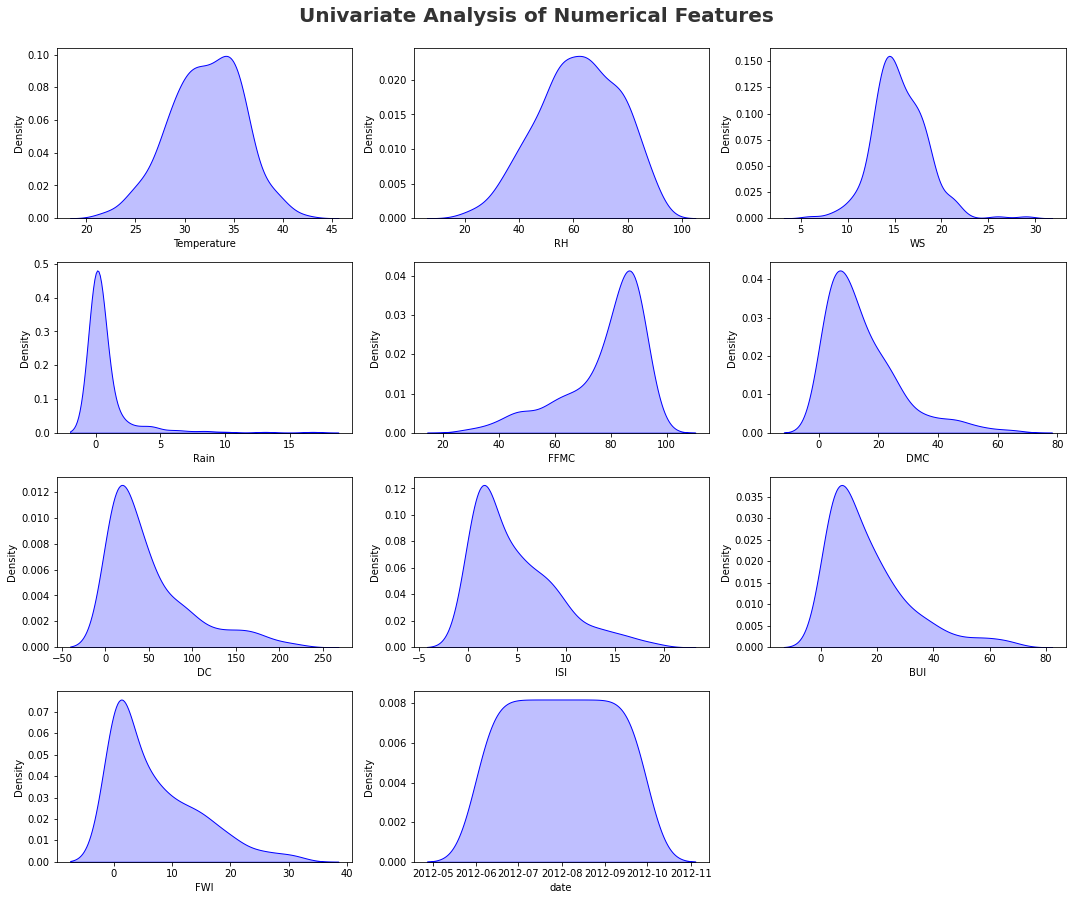

In [130]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(len(numeric_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[numeric_features[i]], shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Report**

1. Rain, DMC, DC, ISI, BUI and FWI are right skewed.<br>
2. FFMC is left skewed.<br>
3. This means there can be outliers in these features.

##### BoxPlot to check the Outliers

<AxesSubplot: >

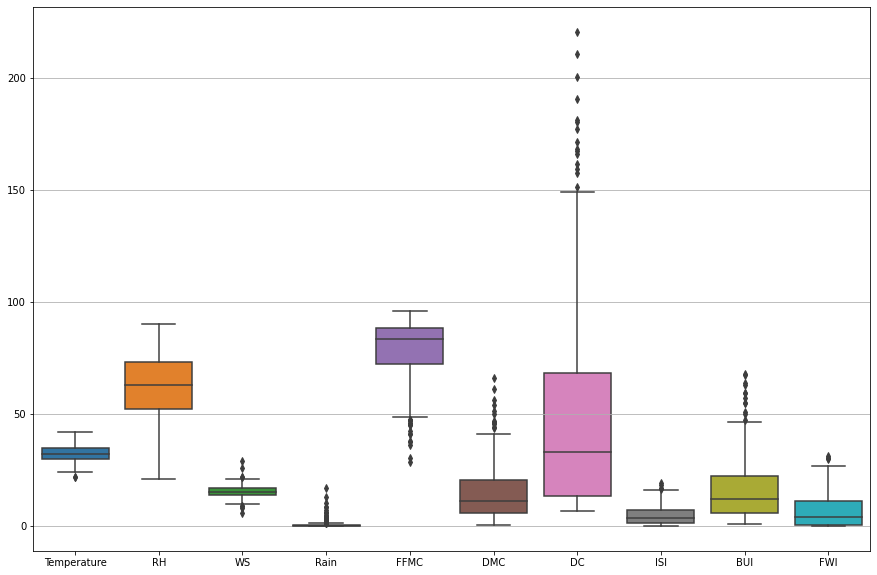

In [134]:
plt.figure(figsize=(15,10))
plt.grid(True)
sns.boxplot(data=df[numeric_features],orient='v')

###### Categorical Features

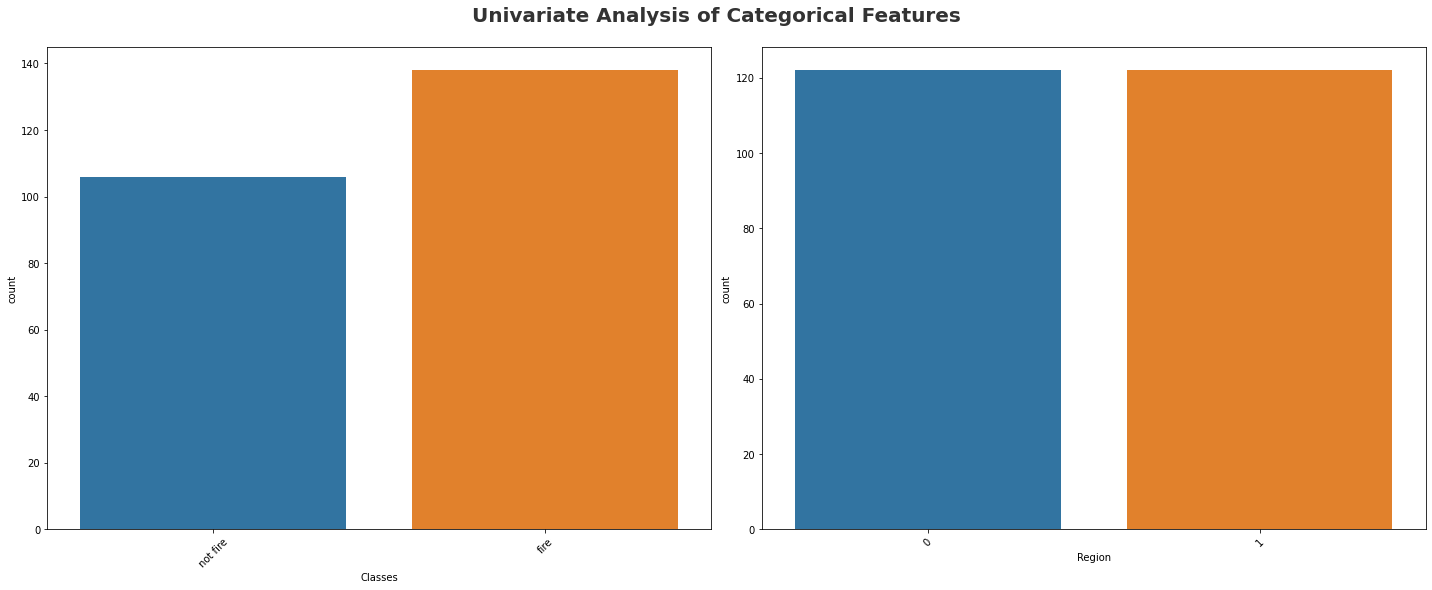

In [136]:
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of Categorical Features",fontsize=20,fontweight='bold',alpha=0.8,y=1.)

for i in range(len(categorical_features)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Section F: Multivariate Analysis

Multivariate Analysis is the analysis of more than one variable.

##### Check Multicollinearity of Numerical Features

In [140]:
df[numeric_features].corr()

<ipython-input-140-40d02229fb7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[numeric_features].corr()


,Temperature,RH,WS,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558800
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.570483
WS,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.029001
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322810
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686342
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874924
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740175
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.908054
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857847
FWI,0.558800,-0.570483,0.029001,-0.322810,0.686342,0.874924,0.740175,0.908054,0.857847,1.000000


<ipython-input-141-4d4f550fba94>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='CMRmap',annot=True)


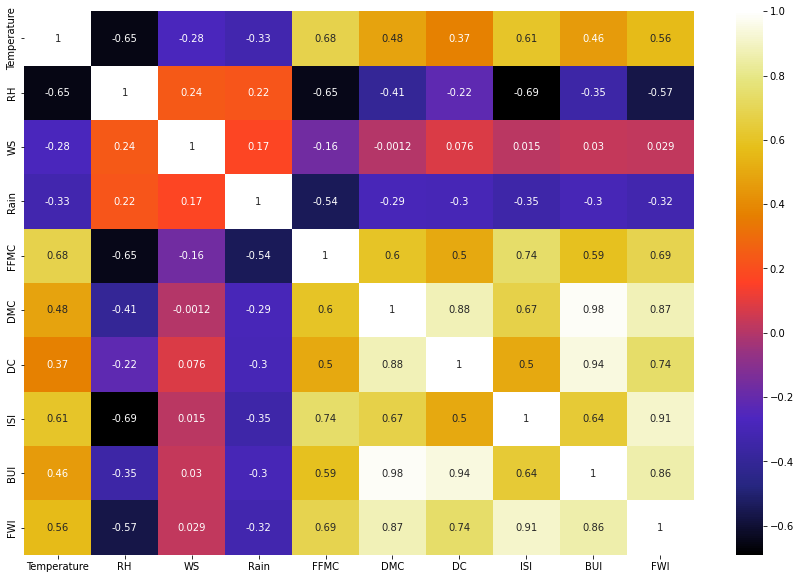

In [141]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True)
plt.show()

**Observation :**

1. Highly +ve correlation between DMC & BMI
2. Highly -ve correlation between RH & ISI, RH & FMCC, RH & Temperature

#### Check Relationship between numerical features and Target Feature

##### Scatter plot

In [142]:
continuous_features = []
for feature in numeric_features:
    if(len(df[feature].unique()) >= 10):
        continuous_features.append(feature)
        
continuous_features

['Temperature',
 'RH',
 'WS',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'date']

In [143]:
len(continuous_features)

11

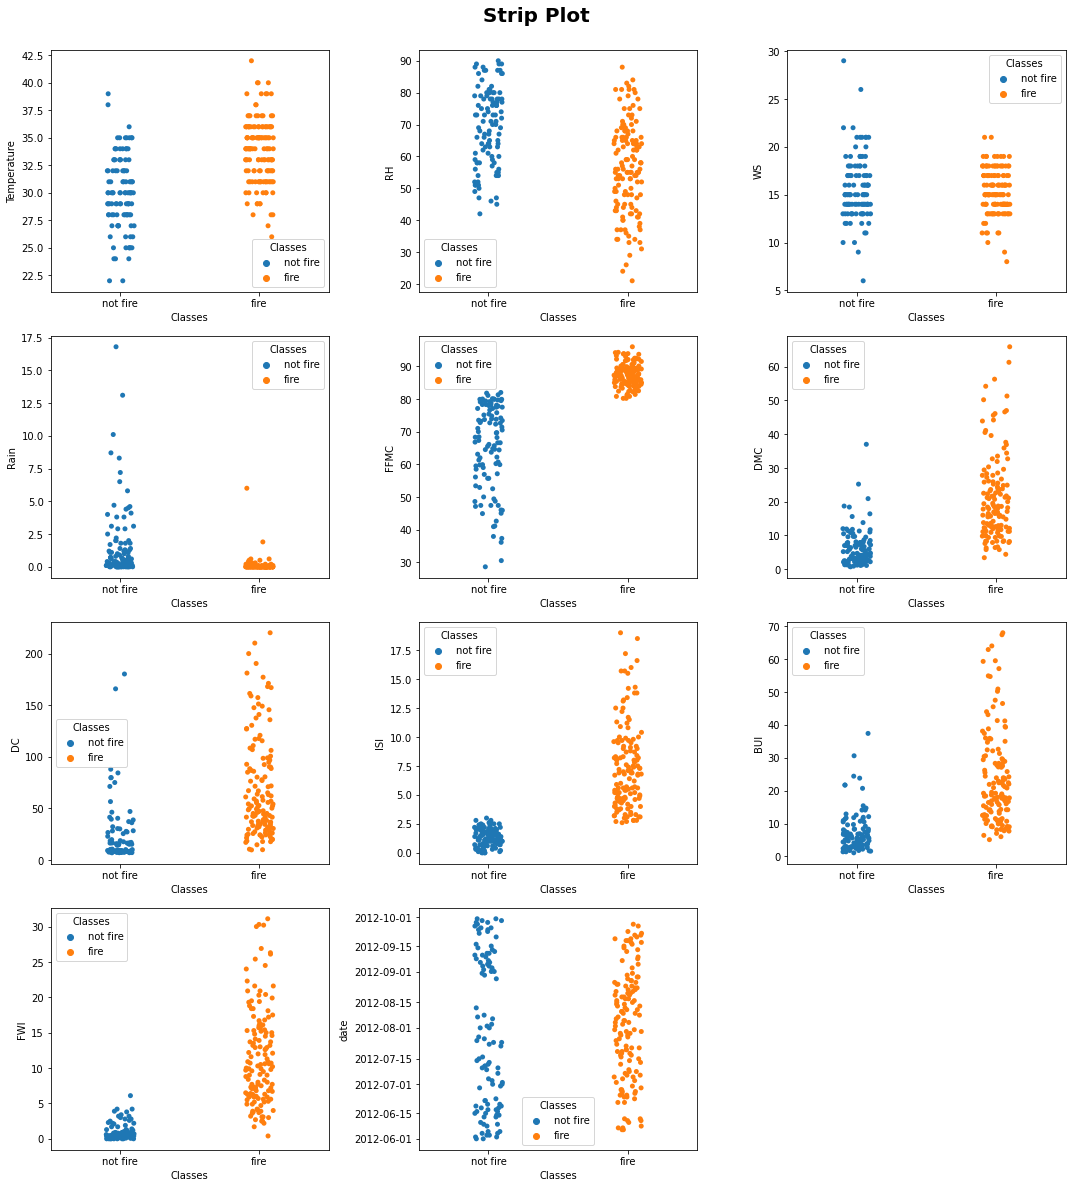

In [148]:
plt.figure(figsize =(15,20))
plt.suptitle('Strip Plot', fontsize=20, fontweight='bold',alpha=1,y=1)

for i in range(len(continuous_features)):
    plt.subplot(5,3,i+1)
    sns.stripplot(y=continuous_features[i], x='Classes', data=df, hue='Classes')
    plt.tight_layout()

**Observations**

1. Places with higher temp has Fire.<br>
2. Places with low humidity had Fire.<br>
3. High FFMC (more than 80) has Fire.<br>
4. ISI > 2.5 has Fire.<br>
5. Low rain i.e. <1.5 has fire.<br>
6. BUI more than 8 has +ve correlation with Fire.  

### Section G: GRaphical Analysis

#### Temp Vs Classes

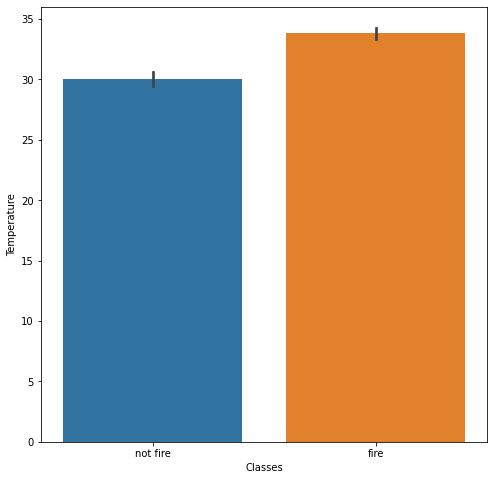

In [178]:
plt.figure(figsize=(8,8))
sns.barplot(x='Classes',y='Temperature',data=df)
plt.show()

IF temperature is more than 30 degrees then there are more chances of fire.

##### Wind Speed Vs Classes

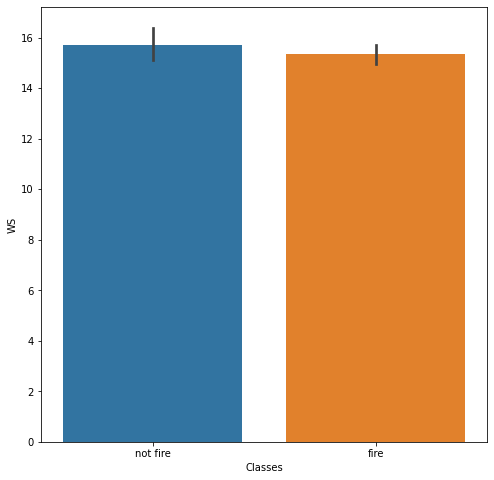

In [179]:
plt.figure(figsize=(8,8))
sns.barplot(x='Classes',y='WS',data=df)
plt.show()

##### Humidity Vs Classes

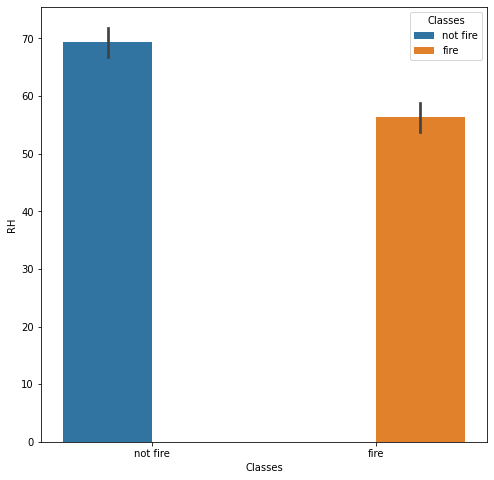

In [186]:
plt.figure(figsize=(8,8))
sns.barplot(x='Classes',y='RH',data=df, hue='Classes')
plt.show()

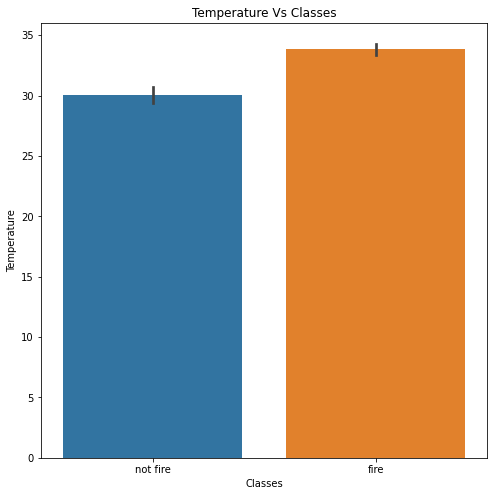

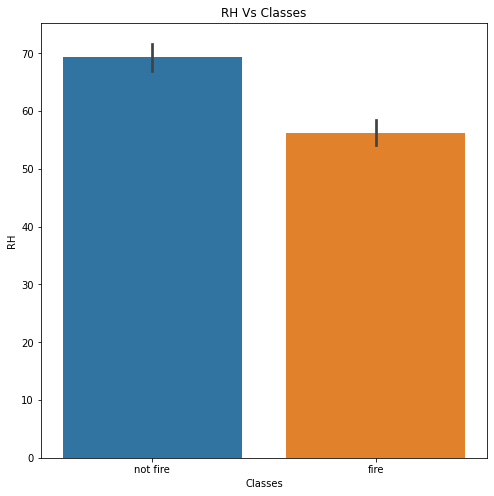

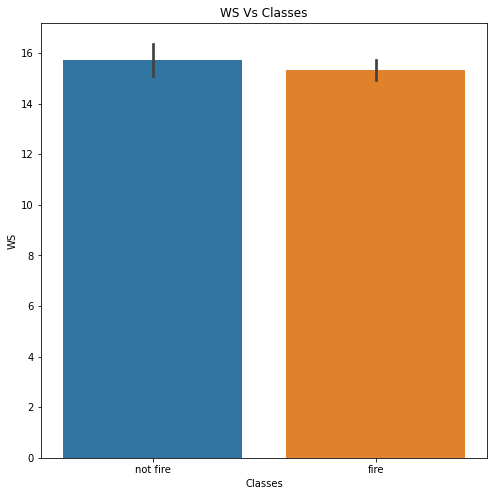

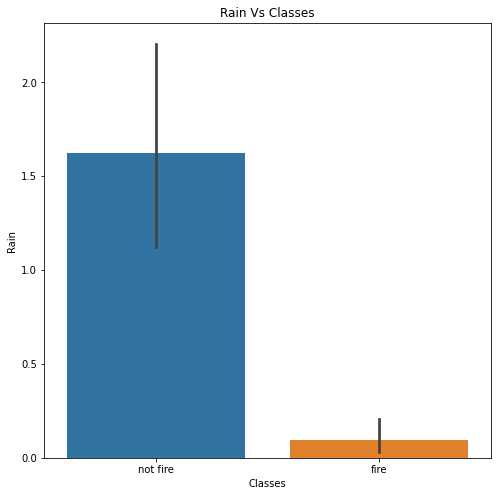

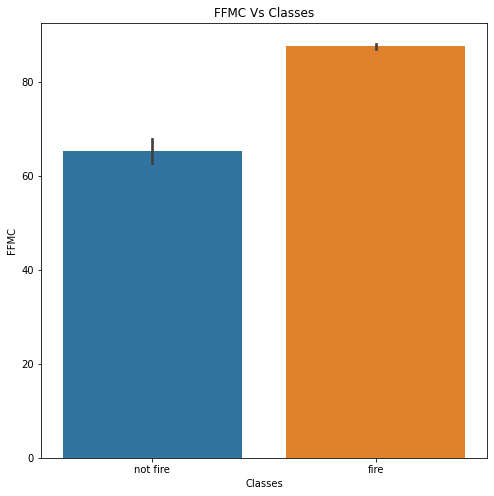

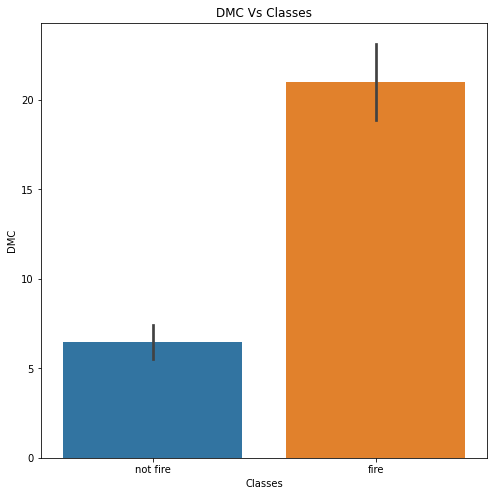

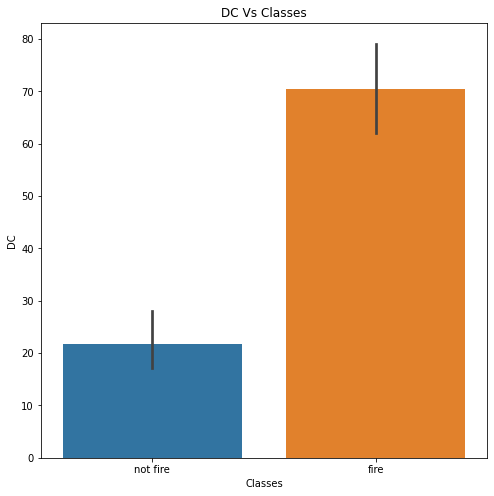

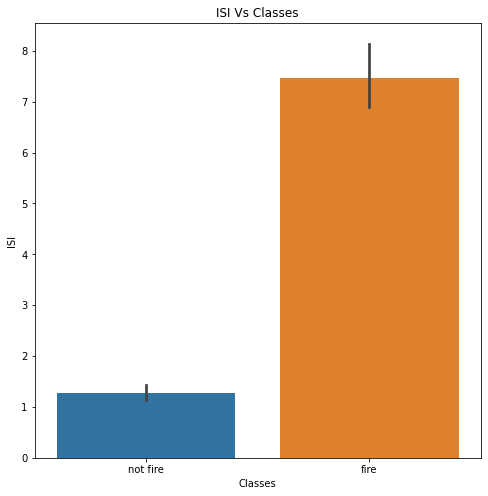

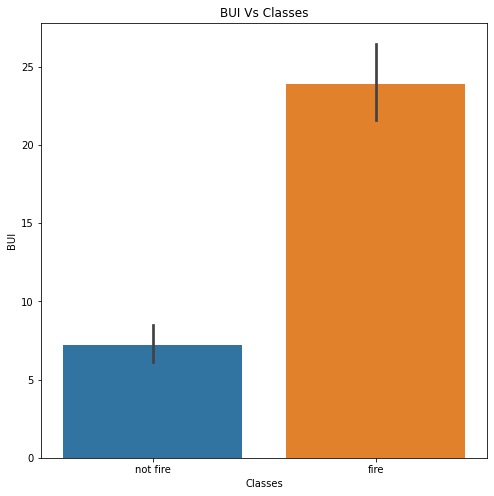

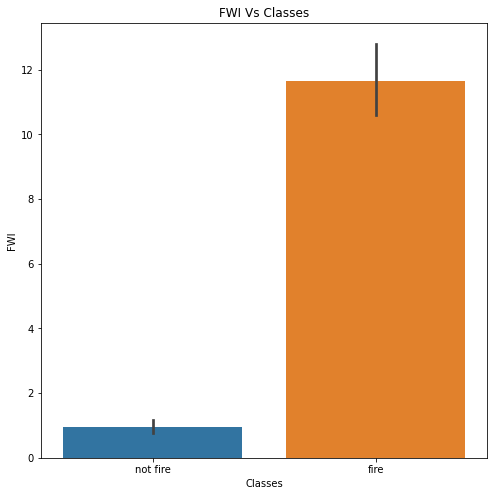

In [196]:
for i in ['Temperature','RH','WS','Rain','FFMC','DMC','DC','ISI','BUI','FWI']:
    plt.figure(figsize=(8,8))
    plt.title(i + ' Vs Classes')
    sns.barplot(y=df[i],x='Classes',data=df)
    plt.show()

**Observations**

1. If Temperature is more than 30 degrees then there are more chances of Fire.<br>
2. HUmidity less than 60 also has positive correlation with Fire.<br>
3. High Rain means no Fire.(Quite Obvious)<br>
4. High FFMC (more than 65) means greater chances of fire.<br>
5. DMC more than 6 or 7 also have positive correlation with Fire.<br>
6. High ISI means  high rate of fire spread.<br>
7. FWI is used to estimate fire danger. High FWI means high chances of Fire.<br>

##### Distribution of Temperature

Text(0.5, 0, 'Temperature')

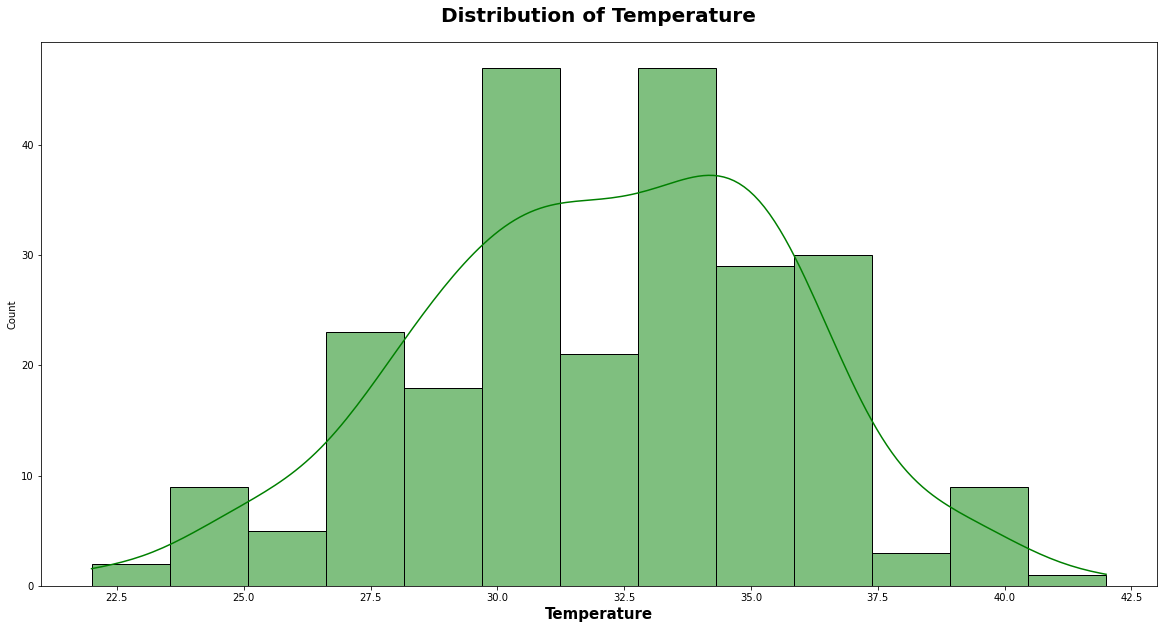

In [197]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature", x=df.Temperature, color='g', kde=True)
plt.title("Distribution of Temperature", weight='bold', fontsize=20, pad=20)
plt.xlabel('Temperature', weight='bold', fontsize=15)

### Final Report

1. The datset is for 2 regions but it's a small dataset. 
2. 2 Regions are Bejaia and Sidi-Bel Abbes.
3. Region 0 means ejaia and 1 means Sidi-Bel Abbes.
4. Classes is the Target Column. It has 2 values Fire or Not Fire.
5. Skewness is found in some columns and boxplot also showed Outliers for those columns.
6. Temperature, Humidity,DMC, ISI has positive correlation with the Fire.
7. Rain has negative correlation with Fire.
8. We have already done majority of celaning for EDA so we won't need to clean it again for this dataset.
9. We need to encode the Classes column before building the model.